In [109]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

In [110]:
import seaborn as sns
df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [111]:
df.head()
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

object means there are multi type data in this column

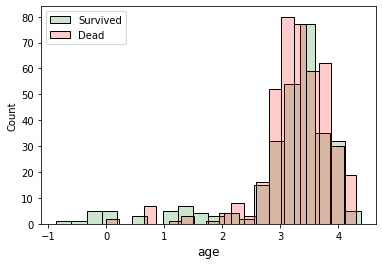

In [112]:
survived = df[df['Survived'] == 1]['Age'].tolist()
survived = np.log(survived)
sns.histplot(survived, bins=20, color='green', alpha=0.2, label='Survived')
dead = df[df['Survived'] == 0]['Age'].tolist() 

dead = np.log(dead)     # log is useful 
sns.histplot(dead, bins=20, color='red', alpha=0.2, label='Dead')
import matplotlib.pyplot as plt
plt.legend()
plt.xlabel('age', fontsize=12)
plt.show()

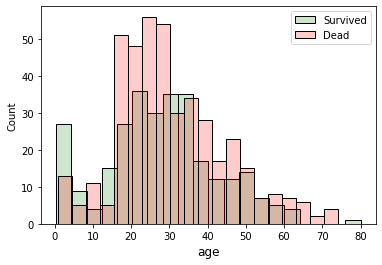

In [113]:
survived = df[df['Survived'] == 1]['Age'].tolist()
sns.histplot(survived, bins=20, color='green', alpha=0.2, label='Survived')
dead = df[df['Survived'] == 0]['Age'].tolist() 
sns.histplot(dead, bins=20, color='red', alpha=0.2, label='Dead')
import matplotlib.pyplot as plt
plt.legend()
plt.xlabel('age', fontsize=12)
plt.show()

# so we can say the larger pclass ther more possible dead

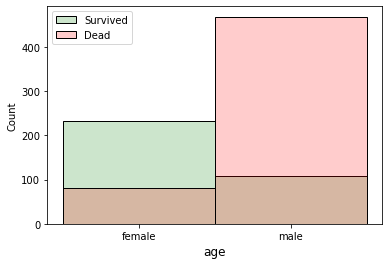

In [114]:
survived = df[df['Survived'] == 1]['Sex'].tolist()
sns.histplot(survived, bins=20, color='green', alpha=0.2, label='Survived')
dead = df[df['Survived'] == 0]['Sex'].tolist() 
sns.histplot(dead, bins=20, color='red', alpha=0.2, label='Dead')
import matplotlib.pyplot as plt
plt.legend()
plt.xlabel('age', fontsize=12)
plt.show()

# so female survied more than male 
a important feature with approximately 0.76 score alone

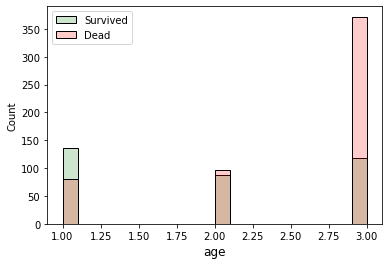

In [115]:
survived = df[df['Survived'] == 1]['Pclass'].tolist()
sns.histplot(survived, bins=20, color='green', alpha=0.2, label='Survived')
dead = df[df['Survived'] == 0]['Pclass'].tolist() 
sns.histplot(dead, bins=20, color='red', alpha=0.2, label='Dead')
import matplotlib.pyplot as plt
plt.legend()
plt.xlabel('age', fontsize=12)
plt.show()

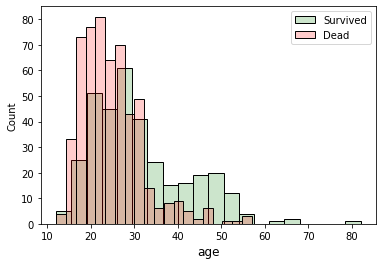

In [116]:
survived = df[df['Survived'] == 1]['Name'].tolist()
survived = [ len(i) for i in survived ]
sns.histplot(survived, bins=20, color='green', alpha=0.2, label='Survived')
dead = df[df['Survived'] == 0]['Name'].tolist() 

dead = [len(i) for i in dead]
sns.histplot(dead, bins=20, color='red', alpha=0.2, label='Dead')
import matplotlib.pyplot as plt
plt.legend()
plt.xlabel('age', fontsize=12)
plt.show()

# model part 
first only using int and float data for a test
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [117]:
# model import 
from sklearn.ensemble import GradientBoostingClassifier

In [118]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=1.0, max_depth=1, random_state=0)
x = df[['Pclass','Sex' ,'Age', 'SibSp', 'Parch', 'Fare']].fillna(0)
x.replace('male','1',inplace=True)
x.replace('female','0',inplace=True)
x = x.values
y = df['Survived'].values
clf.fit(x, y)

test_df[['Pclass', 'Sex','Age', 'SibSp', 'Parch', 'Fare']].fillna(0)
x_test = test_df[['Pclass','Sex' ,'Age', 'SibSp', 'Parch', 'Fare']]
x_test.replace('male','1',inplace=True)
x_test.replace('female','0',inplace=True)
x_test = x_test.values
y_pred = clf.predict(x_test)
result_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})
result_df.to_csv('./data/submit.csv', index=False)

d:\Program Files\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
d:\Program Files\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').